# FIFA - VALUE OF PLAYER PREDICTION 

18 May 2022

                                                                                Team Members 
                                                                                 * Siddhant Gupta (50441839)
                                                                                 * Kishore Kumar (50442203)
                                                                                 * Vineeth ReddyTati (50369160)
                                                                                 * Anjali T (50441491)   

## Problem Tackled 
Predicting the value of a player with accuracy

Our project considered one year data of fifa players , fifa 2018  . We intended to predict the value of the player based on features provided  . We used five models and compared the results to find the appropriate model for this problem . 

- linear regression 
- KNeighborsClassifier method 
- SVC 
- Random Forest 
- Descision Tree 

We followed the below listed steps to create our model
- loading the data using pandas 
- understanding the data and columns 
- normalizing the data into understandable data bases 
- visualising the data 
- understanding the dependencies for value
- pre processing data , removing na's , clearing less useful features 
- dividing the table into training and testing data set to understand the accuracy of our system 
- constructing the models 
- visualising the models 

In [1]:
### loading all necesary libraries 
import pandas as pd

import sqlite3
from sqlite3 import Error

import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict


##  1) Creating data base and tables from text file 

In [2]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn
def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [3]:
## an overview of the data 

col1 = []
all1 = []
with open('players_18.txt', encoding = 'utf-8') as df:
    for line in df:
        if not line.strip():
            continue 
        all1.append(line.strip().split('\t'))
coll_names = all1[0]
number_of_values = len(all1)
number_of_features = len(line.split('\t'))
print(f'Column Names : {coll_names}')
print(f'Size of the data set : {number_of_values} , {number_of_features}')

Column Names : ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_

#### data schema for required columns only 
##### df 
- [Sofifa_id] Real not null primary Key 
- [Age] Integer not null 
- [Overall] real not null  
- [Potential] real not null
- [Value_eur] real not null
- [Wage_eur] real not null 
- [International_reputation] Integer not null 

##### dt 
- [Sofifa_id] Real not null primary key 
- [Age] Integer not null 
- [Overall] Real not null
- [Potential] real not null
- [Value_eur] real not null
- [Wage_eur] real not null
- [Player_positions] Text 
- [International_reputation] integers not null
- [Weak_foot] text not null
- [Skill_moves] text not null 
- [Release_clause_eur] real not null
- [Contract_valid_until] real not null 

##### Player_Details
- [Sofifa_id] Real not null primary key
- [Short_name] Text not null
- [Long_name] Text not null

##### Player_Country
- [Country_id] Integer not null primary key
- [Nationality] Text not null

##### Player_Club
- [Club_id] Integer not null primary key
- [Club] Text not null

##### Player_personality
- [Sofifa_id] Real not null primary key
- [Age] integer not null
- [Height_cm] integer not null
- [Weight_kg] integer not null

##### Player_value
- [Sofifa_id] Real not null primary key
- [Value_eur] integer not null
- [wage_eur] integer not null
- [Player_positions] Text not null
- [International_reputation] integer not null
- [Club_id] integer not null foreign key to Player_Club table



In [4]:
sofifa_id = []
sn = []
ln = []
age = []
dob = []
height = []
weight = []
country = []
club = []
overall = []
potential = []
value_eur = []
wage_eur = []
player_positions = []
preferred_foot = []
international_reputation =[]
weak_foot=[]
skill_moves=[]
work_rate=[]
release_clause_eur=[]
player_tags=[]
with open('players_18.txt') as file :
    next(file)
    for line in file:
        if not line.strip():
            continue 
        line = line.strip().split('\t')
        sofifa_id.append(line[0])
        sn.append(line[2])
        ln.append(line[3])
        age.append(line[4])
        dob.append(line[5])
        height.append(line[6])
        weight.append(line[7])
        country.append(line[8])
        club.append(line[9])
        overall.append(line[10])
        potential.append(line[11])
        value_eur.append(line[12])
        wage_eur.append(line[13])
        player_positions.append(line[14])
        preferred_foot.append(line[15])
        international_reputation.append(line[16])
        weak_foot.append(line[17])
        skill_moves.append(line[18])
        work_rate.append(line[19])
        release_clause_eur.append(line[22])
        player_tags.append(line[23])

In [5]:
def table1(database_filename):
    table1=list(zip(sofifa_id,sn,ln))
    create_table_sql1 = """CREATE TABLE [Player_Details] (
                [sofifa_id] Real not null primary key,
                [short_name] Text not null,
                [long_name] Text not null
            );"""
    database_filename = 'project.db'  
    conn = sqlite3.connect(database_filename)
    create_table(conn, create_table_sql1,'Player_Details')
    def insert_Player(conn, values):
        sql = '''INSERT INTO Player_Details(sofifa_id,short_name,long_name)VALUES(?,?,?)'''
        cur = conn.cursor()
        cur.execute(sql, values)
        return cur.lastrowid

    with conn:
        for r in table1:
            insert_Player(conn,(r[0],r[1],r[2]))
    sel1 = 'select * from Player_Details'
    table1 = pd.read_sql_query(sel1, conn)
    return table1



In [6]:
def table2(database_filename):
    table2=list(country)
    v = sorted(list(set(table2)))
    create_table_sql2 = """CREATE TABLE [Player_Country] (
                [Country_id] Integer not null primary key AUTOINCREMENT,
                [nationality] Text not null
            );"""
    database_filename = 'project.db' 
    conn = sqlite3.connect(database_filename)
    create_table(conn, create_table_sql2,'Player_Country')
    def insert_country(conn, values):
        sql = '''INSERT INTO Player_Country(nationality)VALUES(?)'''
        cur = conn.cursor()
        cur.execute(sql, values)
        return cur.lastrowid

    with conn:
        for new in v:
            insert_country(conn,(new,))
    sel2 = 'select * from Player_Country'
    table2 = pd.read_sql_query(sel2, conn)
    return table2



In [7]:
def table3(database_filename):
    table3=list(club)
    u=sorted(list(set(table3)))
    create_table_sql3 = """CREATE TABLE [Player_Club] (
                [Club_id] Integer not null primary key AUTOINCREMENT,
                [club] Text not null
            );"""
    database_filename = 'project.db'
    conn = sqlite3.connect(database_filename)
    create_table(conn, create_table_sql3,'Player_Club')


    def insert_club(conn, values):
        sql = '''INSERT INTO Player_Club(club)VALUES(?)'''
        cur = conn.cursor()
        cur.execute(sql, values)
        return cur.lastrowid

    with conn:
        for new in u:
            insert_club(conn,(new,))
    sel3 = 'select * from Player_Club'
    table3 = pd.read_sql_query(sel3, conn)
    return table3

In [8]:
def table4(database_filename):
    table4=list(zip(sofifa_id,age,height,weight))
    create_table_sql4 = """CREATE TABLE [Player_personality] (
                [sofifa_id] Real not null primary key,
                [age] integer not null,
                [height_cm] integer not null,
                [weight_kg] integer not null
            );"""
    database_filename = 'project.db'  
    conn = sqlite3.connect(database_filename)
    create_table(conn, create_table_sql4,'Player_personality')


    def insert_personality(conn, values):
        sql = '''INSERT INTO Player_personality(sofifa_id,age,height_cm,weight_kg)VALUES(?,?,?,?)'''
        #step2_create_region_to_regionid_dictionary(normalized_database_filename)
        cur = conn.cursor()
        cur.execute(sql, values)
        return cur.lastrowid

    with conn:
        for r in table4:
            insert_personality(conn,((r[0],r[1],r[2],r[3])))
    sel4 = 'select * from Player_personality'
    table4 = pd.read_sql_query(sel4, conn)
    return table4



In [9]:
def table5(database_filename):
    table5=[]
    def create_club_to_clubid_dictionary(normalized_database_filename):
        normalized_database_filename = 'project.db'
        conn = create_connection(normalized_database_filename)
        sql_statement = "SELECT * FROM Player_Club;"

        df = execute_sql_statement(sql_statement, conn)  

        club_dict = dict()  
        for l in df:
            club_dict[l[1]] = l[0]
        return club_dict
    z = create_club_to_clubid_dictionary('project.db')
    for idx,r in enumerate(club):
        table5.append((sofifa_id[idx],value_eur[idx],wage_eur[idx],player_positions[idx],international_reputation[idx],z[r]))
    create_table_sql5 = """CREATE TABLE [Player_value] (
                [sofifa_id] Real not null primary key,
                [value_eur] integer not null,
                [wage_eur] integer not null,
                [player_positions] Text not null,
                [international_reputation] integer not null,
                [Club_id] integer,
                FOREIGN KEY(Club_id) REFERENCES Player_Club(Club_id)
            );"""
    database_filename = 'project.db'
    conn = sqlite3.connect(database_filename)
    create_table(conn, create_table_sql5,'Player_value')
    def insert_value(conn, values):
        sql = '''INSERT INTO Player_value(sofifa_id,value_eur,wage_eur,player_positions,international_reputation,club_id)VALUES(?,?,?,?,?,?)'''
        cur = conn.cursor()
        cur.execute(sql, values)
        return cur.lastrowid

    with conn:
        for r in table5:
            insert_value(conn,((r[0],r[1],r[2],r[3],r[4],r[5])))
    sel5 = 'select * from Player_value'
    table5 = pd.read_sql_query(sel5, conn)
    return table5

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sofifa_id, age, overall, potential, value_eur, wage_eur, international_reputation = [], [], [], [], [], [], []
header = None
with open('players_18.txt', encoding = 'utf-8') as file:
    for line in file:
        if not line.strip():
            continue 
        if not header:
            header = line.strip().split('\t')
            continue    
        line = line.strip().split('\t')
        sofifa_id.append(line[0])
        age.append(line[4])
        overall.append(line[10])
        potential.append(line[11])
        value_eur.append(line[12])
        wage_eur.append(line[13])
        international_reputation.append(line[16])

df = []
for i in range(len(sofifa_id)):
    df.append((sofifa_id[i], age[i], overall[i], potential[i], value_eur[i], wage_eur[i], international_reputation[i])) 

database_filename = 'project.db'
conn = sqlite3.connect(database_filename)
cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS df")
cur.execute("CREATE TABLE IF NOT EXISTS df (sofifa_id INTEGER NOT NULL, age INTEGER NOT NULL, overall INTEGER NOT NULL, potential INTEGER NOT NULL, value_eur INTEGER NOT NULL, wage_eur INTEGER NOT NULL, international_reputation INTEGER NOT NULL);")
cur.executemany("INSERT INTO df (sofifa_id, age, overall, potential, value_eur, wage_eur, international_reputation) VALUES (?,?,?,?,?,?,?);", df)
conn.commit()

select = 'select * from df'
df = pd.read_sql_query(select, conn)

In [11]:
sofifa_id, age, overall, potential, value_eur, wage_eur, player_positions, international_reputation, weak_foot, skill_moves, release_clause_eur, contract_valid_until = [], [], [], [], [], [], [], [], [], [], [], []
header = None
with open('players_18.txt', encoding = 'utf-8') as file :
    for line in file:
        if not line.strip():
            continue
        if not header:
            header = line.strip().split('\t')
            continue   
        line = line.strip().split('\t')
        sofifa_id.append(line[0])
        age.append(line[4])
        overall.append(line[10])
        potential.append(line[11])
        value_eur.append(line[12])
        wage_eur.append(line[13])
        player_positions.append(line[14].strip('"'))
        international_reputation.append(line[16])
        weak_foot.append(line[17])
        skill_moves.append(line[18])
        release_clause_eur.append(line[22])
        contract_valid_until.append(line[28])

dt = []
for i in range(len(sofifa_id)):
    dt.append((sofifa_id[i], age[i], overall[i], potential[i], value_eur[i], wage_eur[i], player_positions[i], international_reputation[i], weak_foot[i], skill_moves[i], release_clause_eur[i], contract_valid_until[i]))

database_filename = 'project.db'   
conn = sqlite3.connect(database_filename)
cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS dt")
cur.execute("CREATE TABLE IF NOT EXISTS dt (sofifa_id INTEGER NOT NULL, age INTEGER NOT NULL, overall INTEGER NOT NULL, potential INTEGER NOT NULL, value_eur INTEGER NOT NULL, wage_eur INTEGER NOT NULL, player_positions TEXT NOT NULL, international_reputation INTEGER NOT NULL, weak_foot INTEGER NOT NULL, skill_moves INTEGER NOT NULL, release_clause_eur INTEGER NOT NULL, contract_valid_until INTEGER NOT NULL);")
cur.executemany("INSERT INTO dt (sofifa_id, age, overall, potential, value_eur, wage_eur, player_positions, international_reputation, weak_foot, skill_moves, release_clause_eur, contract_valid_until) VALUES (?,?,?,?,?,?,?,?,?,?,?,?);", dt)
conn.commit() 
select = 'select * from dt'
dt = pd.read_sql_query(select, conn)
       

In [12]:
# table1('project.db')

In [13]:
# table2('project.db')

In [14]:
# table3('project.db')

In [15]:
# table4('project.db')

In [16]:
# table5('project.db')

In [17]:
# df

In [18]:
# dt

## 2) Understanding the data 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   sofifa_id                 17592 non-null  int64
 1   age                       17592 non-null  int64
 2   overall                   17592 non-null  int64
 3   potential                 17592 non-null  int64
 4   value_eur                 17592 non-null  int64
 5   wage_eur                  17592 non-null  int64
 6   international_reputation  17592 non-null  int64
dtypes: int64(7)
memory usage: 962.2 KB


In [20]:
df.shape

(17592, 7)

In [21]:
df.head()

,sofifa_id,age,overall,potential,value_eur,wage_eur,international_reputation
0,20801,32,94,94,95500000,565000,5
1,158023,30,93,93,105000000,565000,5
2,190871,25,92,94,123000000,280000,5
3,167495,31,92,92,61000000,230000,5
4,176580,30,92,92,97000000,510000,5


In [22]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sofifa_id                 17592 non-null  int64 
 1   age                       17592 non-null  int64 
 2   overall                   17592 non-null  int64 
 3   potential                 17592 non-null  int64 
 4   value_eur                 17592 non-null  int64 
 5   wage_eur                  17592 non-null  int64 
 6   player_positions          17592 non-null  object
 7   international_reputation  17592 non-null  int64 
 8   weak_foot                 17592 non-null  int64 
 9   skill_moves               17592 non-null  int64 
 10  release_clause_eur        17592 non-null  object
 11  contract_valid_until      17592 non-null  object
dtypes: int64(9), object(3)
memory usage: 1.6+ MB


In [23]:
dt.shape

(17592, 12)

In [24]:
dt.head()

,sofifa_id,age,overall,potential,value_eur,wage_eur,player_positions,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until
0,20801,32,94,94,95500000,565000,"LW, ST",5,4,5,195800000,2021
1,158023,30,93,93,105000000,565000,RW,5,4,4,215300000,2018
2,190871,25,92,94,123000000,280000,LW,5,5,5,236800000,2022
3,167495,31,92,92,61000000,230000,GK,5,4,1,100700000,2021
4,176580,30,92,92,97000000,510000,ST,5,4,4,198900000,2021


In [25]:
table1('project.db').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sofifa_id   17592 non-null  float64
 1   short_name  17592 non-null  object 
 2   long_name   17592 non-null  object 
dtypes: float64(1), object(2)
memory usage: 412.4+ KB


In [26]:
table1('project.db').shape

(17592, 3)

In [27]:
table1('project.db').head()

,sofifa_id,short_name,long_name
0,20801.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro
1,158023.0,L. Messi,Lionel Andrés Messi Cuccittini
2,190871.0,Neymar,Neymar da Silva Santos Junior
3,167495.0,M. Neuer,Manuel Neuer
4,176580.0,L. Suárez,Luis Alberto Suárez Díaz


In [28]:
table2('project.db').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country_id   164 non-null    int64 
 1   nationality  164 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


In [29]:
table2('project.db').shape

(164, 2)

In [30]:
table2('project.db').head()

,Country_id,nationality
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Angola
4,5,Antigua & Barbuda


In [31]:
table3('project.db').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Club_id  677 non-null    int64 
 1   club     677 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.7+ KB


In [32]:
table3('project.db').shape

(677, 2)

In [33]:
table3('project.db').head()

,Club_id,club
0,1,SSV Jahn Regensburg
1,2,1. FC Heidenheim 1846
2,3,1. FC Kaiserslautern
3,4,1. FC Köln
4,5,1. FC Magdeburg


In [34]:
table4('project.db').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sofifa_id  17592 non-null  float64
 1   age        17592 non-null  int64  
 2   height_cm  17592 non-null  int64  
 3   weight_kg  17592 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 549.9 KB


In [35]:
table4('project.db').shape

(17592, 4)

In [36]:
table4('project.db').head()

,sofifa_id,age,height_cm,weight_kg
0,20801.0,32,185,80
1,158023.0,30,170,72
2,190871.0,25,175,68
3,167495.0,31,193,92
4,176580.0,30,182,86


In [37]:
table5('project.db').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sofifa_id                 17592 non-null  float64
 1   value_eur                 17592 non-null  int64  
 2   wage_eur                  17592 non-null  int64  
 3   player_positions          17592 non-null  object 
 4   international_reputation  17592 non-null  int64  
 5   Club_id                   17592 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 824.8+ KB


In [38]:
table5('project.db').shape

(17592, 6)

In [39]:
table5('project.db').head()

,sofifa_id,value_eur,wage_eur,player_positions,international_reputation,Club_id
0,20801.0,95500000,565000,"LW, ST",5,493
1,158023.0,105000000,565000,RW,5,227
2,190871.0,123000000,280000,LW,5,455
3,167495.0,61000000,230000,GK,5,230
4,176580.0,97000000,510000,ST,5,227


##  3) Visualising the data

### AGE

<Figure size 1152x2160 with 0 Axes>

<Figure size 1152x2160 with 0 Axes>

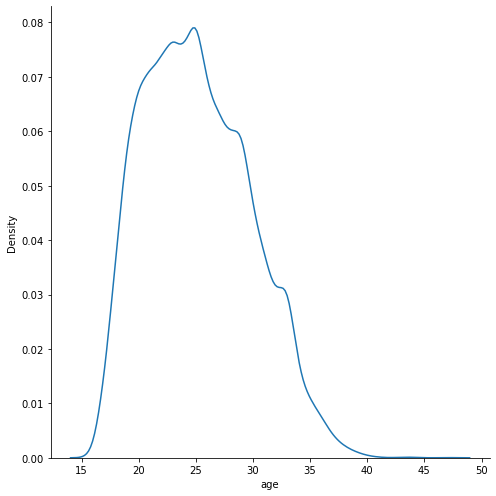

In [40]:
plt.figure(figsize=(16, 30))
g = sns.displot(data=table4('project.db'), x="age", kind="kde", height = 7)

 We understand from the above graph that max players of the age grop of 20 - 28

### AGE VS VALUE

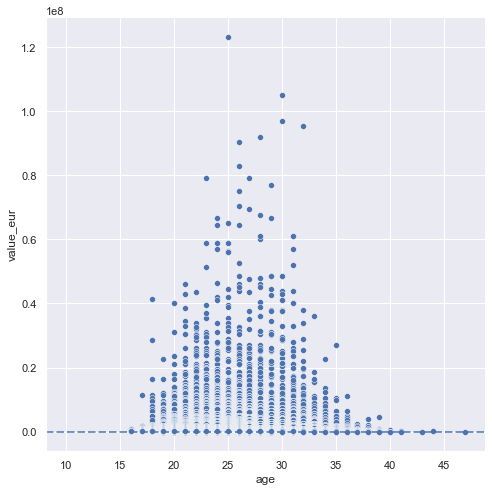

In [41]:
sns.set(rc = {'figure.figsize':(10,8)})  
g = sns.relplot(data=df, x="age", y="value_eur",height = 7)
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

from the above graph we can see there is a steep decline of value after or around age 30 . 

### Overall

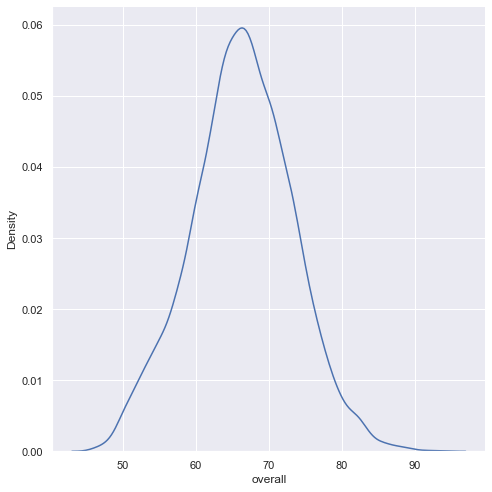

In [42]:
sns.displot(data=df, x="overall",   kind="kde",height = 7)

### Overall VS Value of a Player

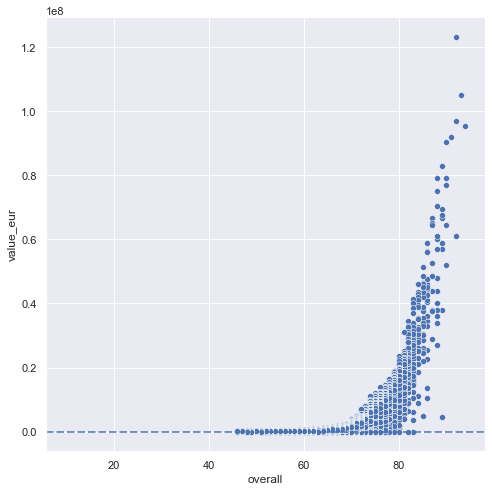

In [43]:
g = sns.relplot(data=df, x="overall", y="value_eur"  ,height = 7  )
g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))

 As overall rating increases value increases

### Potential 

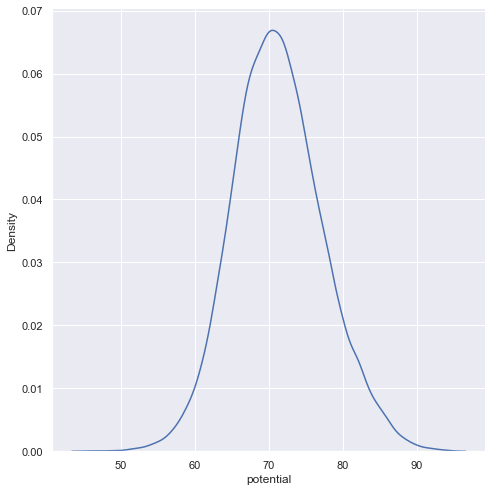

In [44]:
sns.displot(data=df, x="potential",   kind="kde",height = 7)

### Potential vs Value

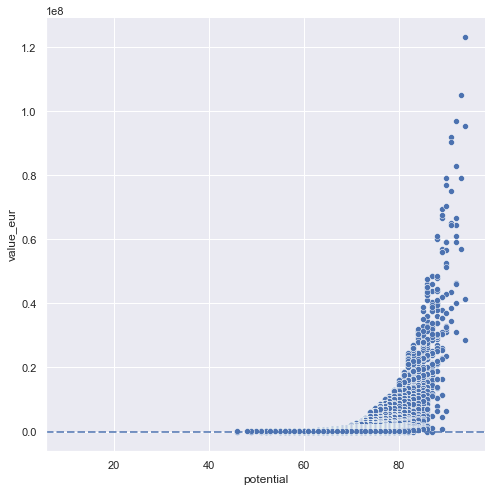

In [45]:
g = sns.relplot(data=df, x="potential", y="value_eur" ,height = 7  )
g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))

 High potential = High Value

### WAGE

(0.0, 200000.0)

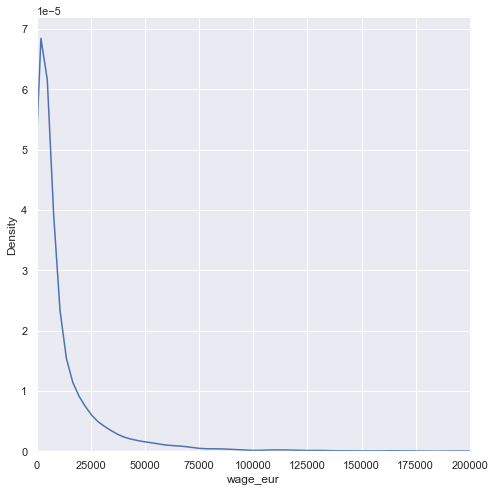

In [46]:
import matplotlib.pyplot as plt
scatter = sns.displot(data=df, x="wage_eur",   kind="kde",height = 7 ,)
plt.xlim(0, 200000)
plt.show()

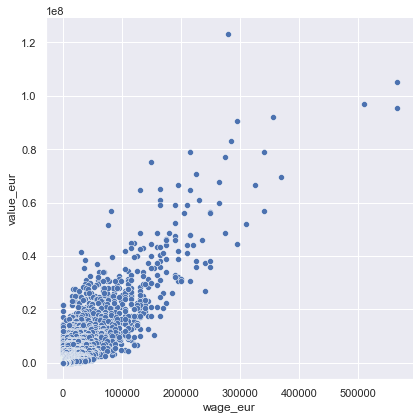

In [47]:
ax = sns.relplot(data=df, x="wage_eur", y="value_eur" ,height = 6  ,)
g.ax.axline(xy1=(9, 7), slope=.2, color="b", dashes=(5, 2))

Understanding from the graph value_eur directly propotional to wage.

 ### International_reputation

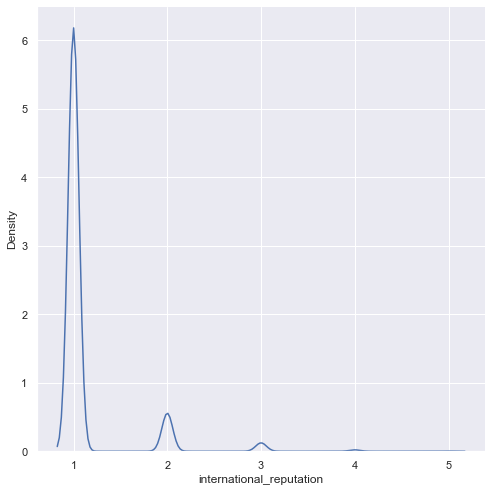

In [48]:
sns.displot(data=df, x="international_reputation",   kind="kde",height = 7 ,)

### Overall VS Value of a Player VS International_reputation

/Users/anjalitanikella/opt/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


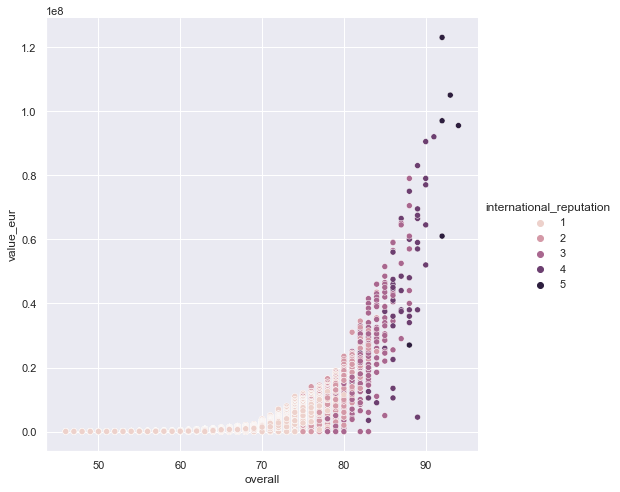

In [49]:
ax = sns.relplot(data=df, x="overall", y="value_eur"  ,hue="international_reputation",height = 7  ,ax=ax)
g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))

 Higher International reputation with high overall means higher value of player 

 ### Player_positions

In [50]:
type(dt)

pandas.core.frame.DataFrame

Available player positions - 
- Left wing(LW) 
- Goal keeper(GK) 
- striker(ST) 
- center back(CB) 
- center midfielder (CM)
- central attacking midfielder(CAM)
- left midfielder(LM)
- central defensive midfielder(CDM)
- left back(LB)
- center forward(CF)
- left wing back(LWB)
- Right Wing(RW) 
- Right midfielder(RM)
- Right Back(RB)
- Right wing back(RWB)

In [51]:
dt['player_positions'].unique()

array(['LW, ST', 'RW', 'LW', 'GK', 'ST', 'CB', 'CM, CDM', 'CAM, CM, RM',
       'LM, ST, LW, RM', 'CAM, ST', 'ST, RW, LW', 'CM, CAM, CDM',
       'RM, RW', 'CAM, RW', 'CAM, RM, LM', 'CDM, CM', 'CAM, CM, LM', 'CM',
       'LB', 'CM, CAM, RM, LM', 'LW, CAM', 'LB, LM', 'LB, CB, CM',
       'LM, LW', 'CM, CDM, CAM', 'CF, LW, ST', 'CB, CDM', 'CM, CAM',
       'LM, ST, LW', 'CF, RW, CAM, ST', 'LM, RM', 'CDM', 'CB, RB, LB',
       'RW, LW', 'RM, RW, LM', 'CAM, RM, LM, LW', 'RM', 'CAM, CF, LM',
       'CM, RM, LM', 'LW, CAM, LM', 'RB', 'CAM, RM', 'RW, RM, CAM',
       'LM, CAM', 'RW, LW, CAM', 'LM', 'ST, CF, CAM', 'CAM',
       'CDM, CB, CM', 'CAM, LM', 'RB, RWB', 'RM, LM', 'LW, RW, CAM, LM',
       'CAM, CM, CF', 'RB, CB', 'ST, CF', 'CAM, CM', 'ST, LM', 'CF, ST',
       'CM, LW', 'CAM, CF', 'CM, LW, RW', 'ST, RW', 'LW, RW, LM',
       'CM, RM', 'LM, ST', 'LW, RW', 'CM, LW, CAM', 'RM, CF, LM',
       'RW, RM, LM', 'CB, RB', 'LM, RM, ST', 'RW, RM', 'RM, ST, LM',
       'RB, RW, CM', 'LB, LWB', 

Filtering only the main positions of players .

In [52]:
for i in range(len(dt.index)): #Taking best position only, not considering multiple positions
     dt['player_positions'][i] = dt.player_positions[i].split(',',1)[0]

/var/folders/nt/76p0d40x0rv0pj8lyhkrpr5r0000gn/T/ipykernel_79204/1916931881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['player_positions'][i] = dt.player_positions[i].split(',',1)[0]


In [53]:
dt['player_positions'].unique()

array(['LW', 'RW', 'GK', 'ST', 'CB', 'CM', 'CAM', 'LM', 'RM', 'CDM', 'LB',
       'CF', 'RB', 'LWB', 'RWB'], dtype=object)

Right and left position won't contribute to the value so converting it into one.

In [54]:
for i in range (len(dt.index)):
          
          if dt['player_positions'][i] == 'LB' or dt['player_positions'][i] == 'RB' or dt['player_positions'][i] == 'LWB' or dt['player_positions'][i] == 'RWB':
            dt['player_positions'][i] = 'LB'
          
          if dt['player_positions'][i] == 'RM' or dt['player_positions'][i] == 'LM':
            dt['player_positions'][i] = 'LM'
          
        
          if dt['player_positions'][i] == 'LW' or dt['player_positions'][i] == 'RW':
            dt['player_positions'][i] = 'LW'
        

/var/folders/nt/76p0d40x0rv0pj8lyhkrpr5r0000gn/T/ipykernel_79204/887874012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['player_positions'][i] = 'LW'
/var/folders/nt/76p0d40x0rv0pj8lyhkrpr5r0000gn/T/ipykernel_79204/887874012.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['player_positions'][i] = 'LM'
/var/folders/nt/76p0d40x0rv0pj8lyhkrpr5r0000gn/T/ipykernel_79204/887874012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [55]:
dt['player_positions'].unique()

array(['LW', 'GK', 'ST', 'CB', 'CM', 'CAM', 'LM', 'CDM', 'LB', 'CF'],
      dtype=object)

Eventually coverting into 'Attacker', 'GK', 'Defender ', 'MID' . 

In [56]:
for i in range (len(dt.index)):
    if dt['player_positions'][i] == 'LW' or dt['player_positions'][i] == 'ST' or dt['player_positions'][i] == 'CAM' or dt['player_positions'][i] == 'CF':
        dt['player_positions'][i] = 'Attacker'
    if dt['player_positions'][i] == 'CM' or dt['player_positions'][i] == 'LM' or dt['player_positions'][i] == 'CDM':
        dt['player_positions'][i] = 'MID'   
    if dt['player_positions'][i] == 'CB' or dt['player_positions'][i] == 'LB' :
        dt['player_positions'][i] = 'Defender '   

/var/folders/nt/76p0d40x0rv0pj8lyhkrpr5r0000gn/T/ipykernel_79204/1719299461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['player_positions'][i] = 'Attacker'
/var/folders/nt/76p0d40x0rv0pj8lyhkrpr5r0000gn/T/ipykernel_79204/1719299461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['player_positions'][i] = 'Defender '
/var/folders/nt/76p0d40x0rv0pj8lyhkrpr5r0000gn/T/ipykernel_79204/1719299461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [57]:
dt['player_positions'].unique()

array(['Attacker', 'GK', 'Defender ', 'MID'], dtype=object)

<BarContainer object of 17592 artists>

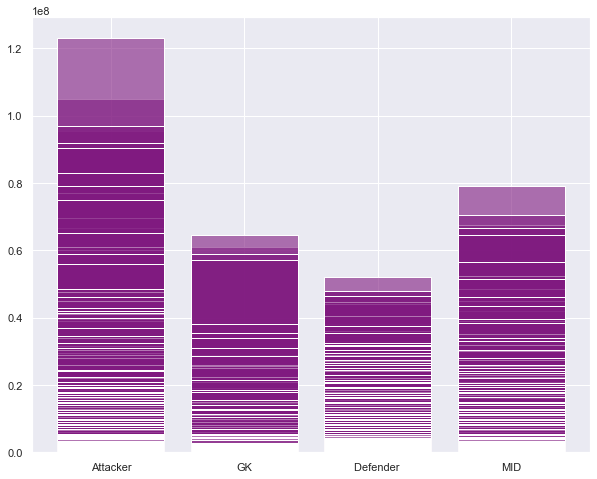

In [58]:
plt.bar(dt.player_positions, dt.value_eur, color = (0.5,0.1,0.5,0.6))
plt.show()

As we can see Attackers are values higher comapred to other positions .

In [59]:
dt['contract_valid_until'] = dt['contract_valid_until'].replace('' ,np.nan)
dt['release_clause_eur'] = dt['release_clause_eur'].replace('' ,np.nan)
dt['player_positions'] = dt['player_positions'].replace('' ,np.nan)

### Contract Valid

In [60]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sofifa_id                 17592 non-null  int64  
 1   age                       17592 non-null  int64  
 2   overall                   17592 non-null  int64  
 3   potential                 17592 non-null  int64  
 4   value_eur                 17592 non-null  int64  
 5   wage_eur                  17592 non-null  int64  
 6   player_positions          17592 non-null  object 
 7   international_reputation  17592 non-null  int64  
 8   weak_foot                 17592 non-null  int64  
 9   skill_moves               17592 non-null  int64  
 10  release_clause_eur        16114 non-null  float64
 11  contract_valid_until      17356 non-null  float64
dtypes: float64(2), int64(9), object(1)
memory usage: 1.6+ MB


In [61]:
dt.contract_valid_until.unique()

array([2021., 2018., 2022., 2019., 2020.,   nan, 2017., 2026., 2023.])

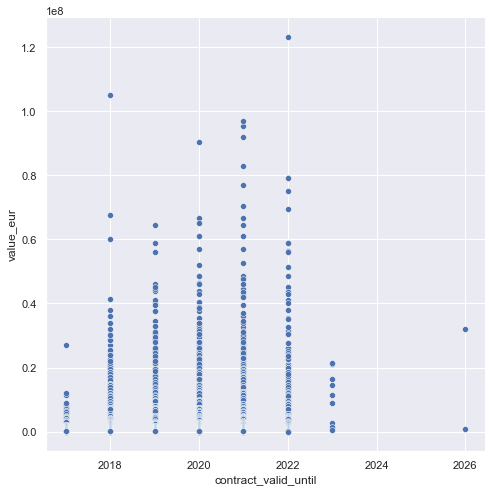

In [62]:
ax = sns.relplot(data=dt, x="contract_valid_until", y="value_eur" ,height = 7  ,)
g.ax.axline(xy1=(9, 7), slope=.2, color="b", dashes=(5, 2))

Contracts with less than 1 year have low value .

### Skill moves 

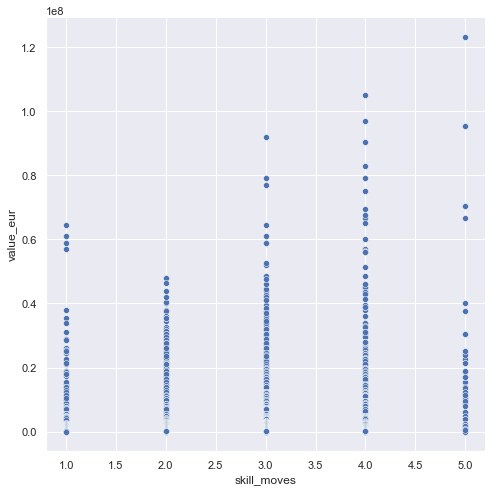

In [63]:
ax = sns.relplot(data=dt, x="skill_moves", y="value_eur" ,height = 7  ,)
g.ax.axline(xy1=(9, 7), slope=.2, color="b", dashes=(5, 2))

High value players have High skill moves value.

## 4) PreProcessing Data 

Replacing na values 

In [64]:
dats = dt.replace(np.nan, 0)

In [65]:
dats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sofifa_id                 17592 non-null  int64  
 1   age                       17592 non-null  int64  
 2   overall                   17592 non-null  int64  
 3   potential                 17592 non-null  int64  
 4   value_eur                 17592 non-null  int64  
 5   wage_eur                  17592 non-null  int64  
 6   player_positions          17592 non-null  object 
 7   international_reputation  17592 non-null  int64  
 8   weak_foot                 17592 non-null  int64  
 9   skill_moves               17592 non-null  int64  
 10  release_clause_eur        17592 non-null  float64
 11  contract_valid_until      17592 non-null  float64
dtypes: float64(2), int64(9), object(1)
memory usage: 1.6+ MB


In [66]:
dats.dtypes

sofifa_id                     int64
age                           int64
overall                       int64
potential                     int64
value_eur                     int64
wage_eur                      int64
player_positions             object
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
release_clause_eur          float64
contract_valid_until        float64
dtype: object

Converting Player position using one hot encoding method 

In [67]:
dats = pd.get_dummies(dats, columns = ['player_positions'])

In [68]:
dats.shape

(17592, 15)

In [69]:
dats.head()

,sofifa_id,age,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,player_positions_Attacker,player_positions_Defender,player_positions_GK,player_positions_MID
0,20801,32,94,94,95500000,565000,5,4,5,195800000.0,2021.0,1,0,0,0
1,158023,30,93,93,105000000,565000,5,4,4,215300000.0,2018.0,1,0,0,0
2,190871,25,92,94,123000000,280000,5,5,5,236800000.0,2022.0,1,0,0,0
3,167495,31,92,92,61000000,230000,5,4,1,100700000.0,2021.0,0,0,1,0
4,176580,30,92,92,97000000,510000,5,4,4,198900000.0,2021.0,1,0,0,0


## 5) Scaling and dividing data into test and training 

In [70]:
y = dats['value_eur']
dats.drop('value_eur' , axis=1 , inplace = True)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(dats, y, test_size=0.2 , random_state=43)

In [72]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.95953961, 0.06451613, 0.16666667, ..., 1.        , 0.        ,
        0.        ],
       [0.96847631, 0.25806452, 0.45833333, ..., 1.        , 0.        ,
        0.        ],
       [0.96656012, 0.09677419, 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59774047, 0.74193548, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.96696747, 0.29032258, 0.4375    , ..., 1.        , 0.        ,
        0.        ],
       [0.98679031, 0.09677419, 0.29166667, ..., 0.        , 0.        ,
        0.        ]])

In [73]:
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[0.87500675, 0.16129032, 0.60416667, ..., 0.        , 1.        ,
        0.        ],
       [0.91766183, 0.12903226, 0.625     , ..., 0.        , 0.        ,
        1.        ],
       [0.96121888, 0.12903226, 0.35416667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.97557164, 0.19354839, 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.82761731, 0.38709677, 0.45833333, ..., 0.        , 0.        ,
        0.        ],
       [0.652325  , 0.4516129 , 0.52083333, ..., 0.        , 0.        ,
        1.        ]])

## 6) Applying Regression models 

### Linear Regression Model 

In [74]:
regressor=LinearRegression()
regressor.fit(X_train_minmax,y_train)

LinearRegression()

In [75]:
y_pred=regressor.predict(X_test_minmax)

In [76]:
SQR_linearreg = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_linearreg = r2_score(y_test, y_pred)
cv_r2_scores_lr = cross_val_score(regressor, dats, y, cv=5,scoring='r2')
print(cv_r2_scores_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_lr)))

[  0.78668246   0.42930958  -1.21244119  -2.6226859  -71.6086473 ]
Mean 5-Fold R Squared: -14.84555647165852


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'linear_regression prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 2446.147775007494, 205959756.4576643)

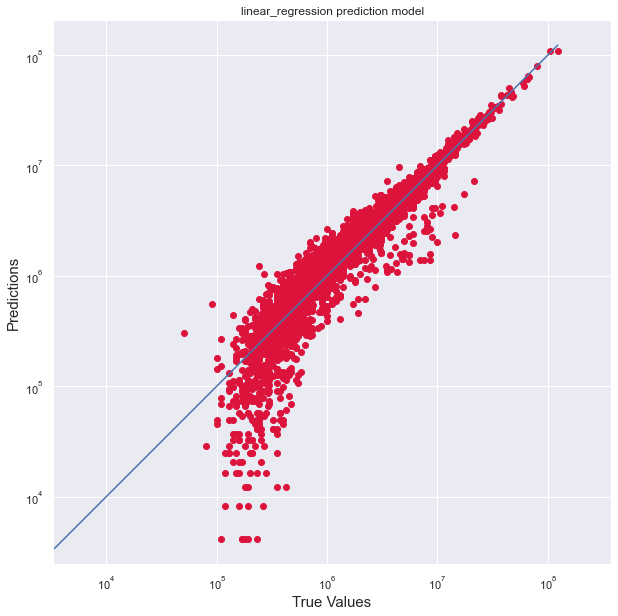

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('linear_regression prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### KNeighborsClassifier

In [78]:
model = KNeighborsClassifier()
model.fit(X_train_minmax, y_train)

KNeighborsClassifier()

In [79]:
actual_y, predict_y = list(), list()
y_predict = model.predict(X_test_minmax)
actual_y.extend(y_test)
predict_y.extend(y_predict)

In [80]:
SQR_KF = np.sqrt(metrics.mean_squared_error(actual_y, predict_y))
R2_KF = r2_score(actual_y, predict_y)
cv_r2_scores_kf = cross_val_score(model, dats, y, cv=5,scoring='r2')
print(cv_r2_scores_kf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_kf)))

/Users/anjalitanikella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.94930165 0.94221201 0.95210545 0.94080084 0.93106474]
Mean 5-Fold R Squared: 0.9430969382149506


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'kfold prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 6244.601721267029, 196970127.94443434)

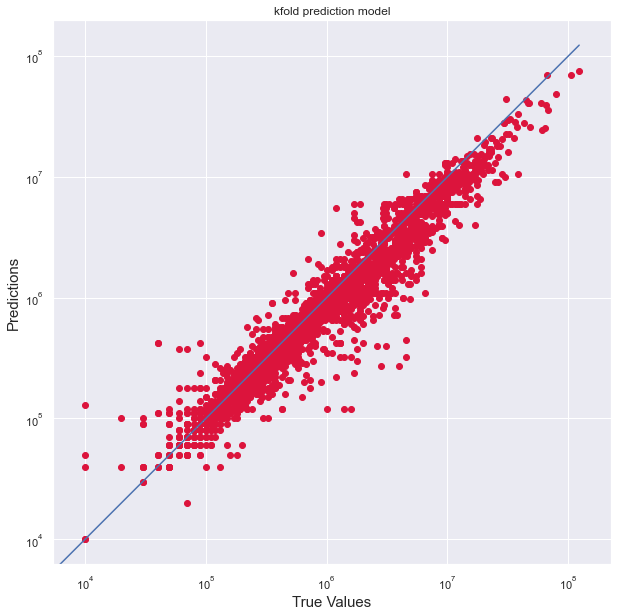

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(actual_y, predict_y, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict_y), max(actual_y))
p2 = min(min(predict_y), min(actual_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('kfold prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### SVC - C-Support Vector Classification.

In [82]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_minmax, y_train)
Y_pred2 = classifier.predict(X_test_minmax)

SVC(kernel='linear', random_state=0)

In [83]:
SQT_SVC = np.sqrt(metrics.mean_squared_error(y_test, Y_pred2))
R2_SVC = r2_score(y_test, Y_pred2)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'SVC prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 6244.601721267029, 196970127.94443434)

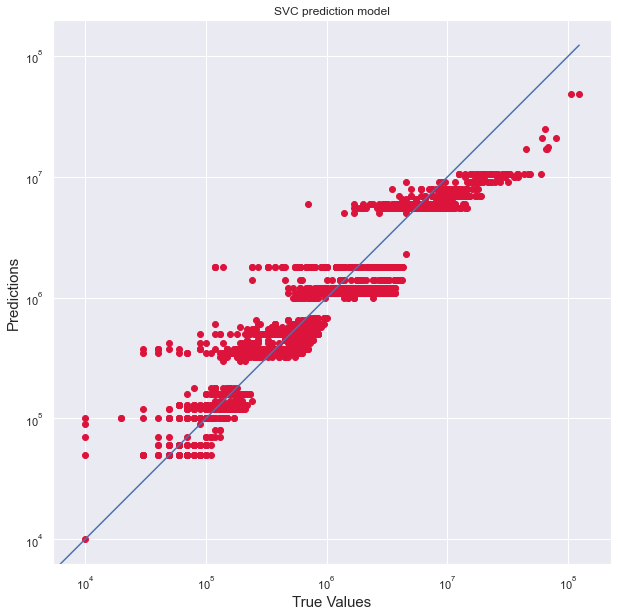

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred2), max(y_test))
p2 = min(min(Y_pred2), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('SVC prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

 ### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train_minmax, y_train)
Y_pred3 = classifier2.predict(X_test_minmax)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [86]:
SQR_RFC = np.sqrt(metrics.mean_squared_error(y_test, Y_pred3))
R2_RFC = r2_score(y_test, Y_pred3)
cv_r2_scores_rfc = cross_val_score(classifier2, dats, y, cv=5,scoring='r2')
print(cv_r2_scores_rfc)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rfc)))

/Users/anjalitanikella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.85258005 0.9149457  0.90239729 0.92506505 0.92827553]
Mean 5-Fold R Squared: 0.9046527228334188


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Random_Forest prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 6244.601721267029, 196970127.94443434)

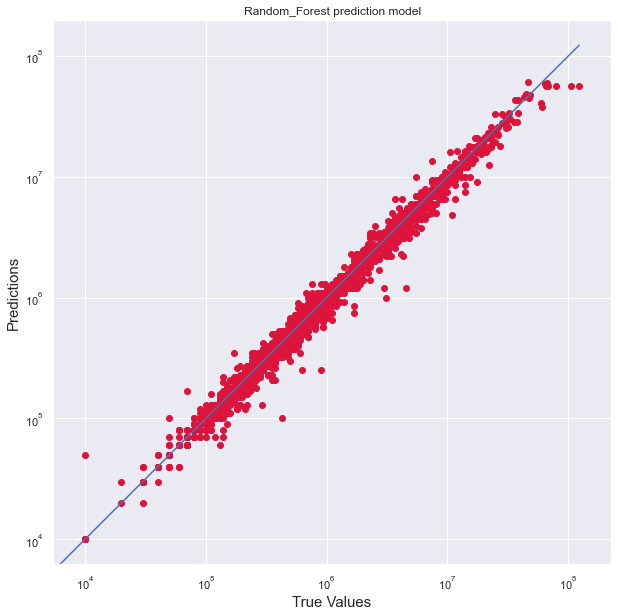

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred3, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred3), max(y_test))
p2 = min(min(Y_pred3), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Random_Forest prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Decision Tree 

In [88]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [89]:
clf = DecisionTreeClassifier()

In [90]:
clf = clf.fit(X_train_minmax, y_train)
y_pred4 = clf.predict(X_test_minmax)

In [91]:
SQR_DT = np.sqrt(metrics.mean_squared_error(y_test, y_pred4))
R2_DT = r2_score(y_test, y_pred4)
cv_r2_scores_DT = cross_val_score(clf, dats, y, cv=5,scoring='r2')
print(cv_r2_scores_DT)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_DT)))

/Users/anjalitanikella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.95565673 0.97471542 0.97280196 0.95425019 0.95158706]
Mean 5-Fold R Squared: 0.9618022719579067


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Decision_Tree prediction model')

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(6244.601721267029, 196970127.94443434, 6244.601721267029, 196970127.94443434)

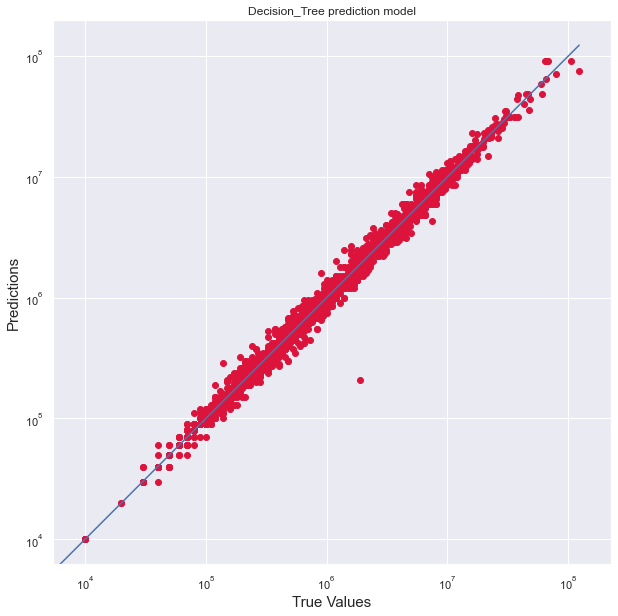

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred4, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred4), max(y_test))
p2 = min(min(y_pred4), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Decision_Tree prediction model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

 ## statistics of each model

In [93]:
header = ['Linear Regression' , 'KNeighborsClassifier' , 'SVC' ,'Random Forest' ,'Desicion Tree']
data = [np.log(SQR_linearreg) , np.log(SQR_KF), np.log(SQT_SVC) , np.log(SQR_RFC) ,np.log( SQR_DT)]
stat_analysis = pd.DataFrame(data = data , index = header )
stat_analysis.rename(columns = {0:'Square_root'}, inplace = True)
stat_analysis['R2_Score'] = [R2_linearreg , R2_KF ,R2_SVC , R2_RFC , R2_DT ]
stat_analysis

,Square_root,R2_Score
Linear Regression,13.804718,0.970989
KNeighborsClassifier,14.670062,0.836244
SVC,15.141746,0.579372
Random Forest,14.355265,0.912749
Desicion Tree,14.062429,0.951425


# Conclusion

We made five models and compared their r2 scores to understand their efficency . tho all models presented us with good results  Linear regression model and Desicion Tree model handled various features much better comparitivley .

# Reference 

https://mkzia.github.io/eas503-notes/intro.html


https://www.kaggle.com/datasets/stefanoleone992/fifa-20-complete-player-dataset


https://scikit-learn.org/stable/supervised_learning.html

# Acknowledgement 

We would like to sincerely thank our Prof. Mohamad Zia for the guidance thought this course helping us accomplish this project.